In [1]:
import os
print(os.getcwd())

/Users/mohamedbahr/Desktop/personal_projects/manufacturing_defect_project/notebooks


In [2]:
import pandas as pd
df = pd.read_csv("../data/manufacturing_defect_dataset.csv")

df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [3]:
import re
df.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower()
    for col in df.columns
]
df.head()

,production_volume,production_cost,supplier_quality,delivery_delay,defect_rate,quality_score,maintenance_hours,downtime_percentage,inventory_turnover,stockout_rate,worker_productivity,safety_incidents,energy_consumption,energy_efficiency,additive_process_time,additive_material_cost,defect_status
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [4]:
n_rows, n_cols = df.shape
summary = {
    "rows": n_rows,
    "columns": n_cols,
    "dtypes": df.dtypes.astype(str).to_dict(),
    "missing_by_col": df.isna().sum().to_dict(),
    "duplicates": int(df.duplicated().sum())
}

summary

{'rows': 3240,
 'columns': 17,
 'dtypes': {'production_volume': 'int64',
  'production_cost': 'float64',
  'supplier_quality': 'float64',
  'delivery_delay': 'int64',
  'defect_rate': 'float64',
  'quality_score': 'float64',
  'maintenance_hours': 'int64',
  'downtime_percentage': 'float64',
  'inventory_turnover': 'float64',
  'stockout_rate': 'float64',
  'worker_productivity': 'float64',
  'safety_incidents': 'int64',
  'energy_consumption': 'float64',
  'energy_efficiency': 'float64',
  'additive_process_time': 'float64',
  'additive_material_cost': 'float64',
  'defect_status': 'int64'},
 'missing_by_col': {'production_volume': 0,
  'production_cost': 0,
  'supplier_quality': 0,
  'delivery_delay': 0,
  'defect_rate': 0,
  'quality_score': 0,
  'maintenance_hours': 0,
  'downtime_percentage': 0,
  'inventory_turnover': 0,
  'stockout_rate': 0,
  'worker_productivity': 0,
  'safety_incidents': 0,
  'energy_consumption': 0,
  'energy_efficiency': 0,
  'additive_process_time': 0,
  '

In [5]:
df.describe()

,production_volume,production_cost,supplier_quality,delivery_delay,defect_rate,quality_score,maintenance_hours,downtime_percentage,inventory_turnover,stockout_rate,worker_productivity,safety_incidents,energy_consumption,energy_efficiency,additive_process_time,additive_material_cost,defect_status
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


In [6]:
df['defect_status'].value_counts(normalize=True) * 100

defect_status
1    84.04321
0    15.95679
Name: proportion, dtype: float64

In [7]:
import numpy as np

# Replace infinite values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Identify target and feature columns
target_col = 'defect_status'

# Ensure target is integer binary {0,1}
df[target_col] = df[target_col].astype(int)

# Separate features (X) and target (y)
feature_cols = [c for c in df.columns if c != target_col]
X = df[feature_cols].copy()
y = df[target_col].copy()

# Class balance
class_counts = y.value_counts().sort_index()
class_ratio = {int(k): int(v) for k, v in class_counts.items()}
minority_ratio = class_counts.min() / class_counts.max() if len(class_counts) > 1 else 1.0

print("Class distribution:")
for label, count in class_ratio.items():
    print(f"  Class {label}: {count} samples ({count / len(y) * 100:.2f}%)")

print(f"\nMinority-to-majority ratio: {minority_ratio:.2f}")
if minority_ratio < 0.5:
    print("Significant class imbalance detected!")


print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Class distribution:
  Class 0: 517 samples (15.96%)
  Class 1: 2723 samples (84.04%)

Minority-to-majority ratio: 0.19
Significant class imbalance detected!
Feature matrix shape: (3240, 16)
Target vector shape: (3240,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("-------Shape of train-test data---------")
print(f'Train feature shape: {X_train.shape}')
print(f'Test feature shape: {X_test.shape}')

-------Shape of train-test data---------
Train feature shape: (2592, 16)
Test feature shape: (648, 16)


In [9]:
# Preprocessing Pipeline
# Only numeric columns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import warnings, lightgbm as lgb
warnings.filterwarnings("ignore")

class SilentLogger:
    def info(self, msg): pass
    def warning(self, msg): pass

lgb.register_logger(SilentLogger())

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
preprocessor_scaled = ColumnTransformer(
    transformers=[("num", numeric_transformer, X.columns)]
)
preprocessor_passthrough = ColumnTransformer(
    transformers=[("num", "passthrough", X.columns)]
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    # Linear Models
    "LogisticRegression": Pipeline(steps=[
        ("prep", preprocessor_scaled),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]),
    "LinearSVC": Pipeline(steps=[
        ("prep", preprocessor_scaled),
        ("clf", LinearSVC(class_weight="balanced", random_state=42))
    ]),

    # Kernel-based Models
    "SVC": Pipeline(steps=[
        ("prep", preprocessor_scaled),
        ("clf", SVC(kernel="rbf", probability=True,
                    class_weight="balanced", random_state=42))
    ]),

    # Tree-Based (Nonlinear) Models
    "DecisionTree": Pipeline(steps=[
        ("prep", preprocessor_passthrough),
        ("clf", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
    ]),
    "RandomForest": Pipeline(steps=[
        ("prep", preprocessor_passthrough),
        ("clf", RandomForestClassifier(
            n_estimators=400, max_depth=None, min_samples_split=2,
            random_state=42, class_weight="balanced_subsample"
        ))
    ]),
    "ExtraTrees": Pipeline(steps=[
        ("prep", preprocessor_passthrough),
        ("clf", ExtraTreesClassifier(
            n_estimators=400, random_state=42, class_weight="balanced_subsample"
        ))
    ]),

    # Boosting Ensembles
    "AdaBoost": Pipeline(steps=[
        ("prep", preprocessor_passthrough),
        ("clf", AdaBoostClassifier(n_estimators=400, random_state=42))
    ]),
    "GradientBoosting": Pipeline(steps=[
        ("prep", preprocessor_passthrough),
        ("clf", GradientBoostingClassifier(n_estimators=400, random_state=42))
    ]),
    "HistGradientBoosting": Pipeline(steps=[
        ("prep", preprocessor_passthrough),
        ("clf", HistGradientBoostingClassifier(random_state=42))
    ]),
    "XGBoost": Pipeline(steps=[
        ("prep", preprocessor_passthrough),
        ("clf", XGBClassifier(
            n_estimators=400, learning_rate=0.1, max_depth=6,
            subsample=0.8, colsample_bytree=0.8, eval_metric="logloss",
            use_label_encoder=False, random_state=42, scale_pos_weight=5,  # for imbalance 
        ))
    ]),
    "LightGBM": Pipeline(steps=[
        ("prep", preprocessor_passthrough),
        ("clf", LGBMClassifier(
            n_estimators=400, learning_rate=0.1, random_state=42, class_weight="balanced",
            verbosity=-1,          # suppress info/warnings
            force_col_wise=True 
        ))
    ]),
    "CatBoost": Pipeline(steps=[
        ("prep", preprocessor_passthrough),
        ("clf", CatBoostClassifier(
            iterations=400, learning_rate=0.1, depth=6,
            verbose=False, random_state=42, auto_class_weights="Balanced"
        ))
    ]),

    # Distance- or Probabilistic-based Models
    "KNN": Pipeline(steps=[
        ("prep", preprocessor_scaled),
        ("clf", KNeighborsClassifier(n_neighbors=7, weights="distance"))
    ]),
    "NaiveBayes": Pipeline(steps=[
        ("prep", preprocessor_scaled),
        ("clf", GaussianNB())
    ])
}


In [10]:
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "roc_auc": "roc_auc"
}
cv_results = {}

for name, pipe in models.items():
    scores = cross_validate(
        pipe, X_train, y_train,
        cv=cv, scoring=scoring,
        n_jobs=-1, return_train_score=False
    )
    cv_results[name] = {
        "accuracy_mean": float(np.mean(scores["test_accuracy"])),
        "accuracy_std": float(np.std(scores["test_accuracy"])),
        "f1_mean": float(np.mean(scores["test_f1"])),
        "f1_std": float(np.std(scores["test_f1"])),
        "roc_auc_mean": float(np.mean(scores["test_roc_auc"])),
        "roc_auc_std": float(np.std(scores["test_roc_auc"])),
    }

cv_df = (
    pd.DataFrame(cv_results)
    .T.sort_values(by="roc_auc_mean", ascending=False)
    .reset_index().rename(columns={"index": "model"})
)
cv_df


,model,accuracy_mean,accuracy_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std
0,LightGBM,0.961031,0.006966,0.977194,0.004013,0.919354,0.021138
1,HistGradientBoosting,0.963345,0.009230,0.978574,0.005332,0.918693,0.024937
2,GradientBoosting,0.961030,0.007681,0.977166,0.004429,0.916263,0.022199
3,XGBoost,0.961031,0.009497,0.977245,0.005469,0.912979,0.020947
4,CatBoost,0.961031,0.008329,0.977179,0.004806,0.912539,0.026845
5,RandomForest,0.962575,0.007495,0.978139,0.004323,0.900167,0.026579
6,ExtraTrees,0.907406,0.005997,0.947626,0.003305,0.897057,0.024274
7,AdaBoost,0.919359,0.009858,0.953269,0.005723,0.890415,0.021232
8,NaiveBayes,0.903164,0.005769,0.945045,0.003186,0.881173,0.025727
9,SVC,0.866115,0.024004,0.917653,0.015111,0.873819,0.025841


In [11]:
top3 = cv_df.head(3)["model"].tolist()

print(top3)

tuned_models = {}

['LightGBM', 'HistGradientBoosting', 'GradientBoosting']


In [ ]:
from scipy.stats import randint, uniform, loguniform

param_spaces = {
   
    "LogisticRegression": {
        "clf__C": loguniform(1e-3, 1e2),
        "clf__penalty": ["l2"],
        "clf__solver": ["lbfgs", "liblinear", "saga"],
    },
    "SVC": {
        "clf__C": loguniform(1e-2, 1e2),
        "clf__gamma": loguniform(1e-3, 1e1),
        "clf__kernel": ["rbf"],  
    },
    "LinearSVC": {
        "clf__C": loguniform(1e-3, 1e2),
        "clf__loss": ["hinge", "squared_hinge"],
    },

    
    "DecisionTree": {
        "clf__max_depth": randint(3, 21),
        "clf__min_samples_split": randint(2, 21),
        "clf__min_samples_leaf": randint(1, 11),
    },
    "RandomForest": {
        "clf__n_estimators": randint(300, 1001),
        "clf__max_depth": [None] + list(range(6, 21, 2)),
        "clf__min_samples_split": randint(2, 21),
        "clf__min_samples_leaf": randint(1, 11),
        "clf__max_features": ["sqrt", "log2", None],
    },
    "ExtraTrees": {
        "clf__n_estimators": randint(300, 1001),
        "clf__max_depth": [None] + list(range(6, 21, 2)),
        "clf__min_samples_split": randint(2, 21),
        "clf__min_samples_leaf": randint(1, 11),
        "clf__max_features": ["sqrt", "log2", None],
    },

    
    "GradientBoosting": {
        "clf__n_estimators": randint(300, 1001),
        "clf__learning_rate": loguniform(1e-2, 2e-1),
        "clf__max_depth": randint(2, 6),
        "clf__min_samples_split": randint(2, 21),
        "clf__min_samples_leaf": randint(1, 21),
        "clf__subsample": uniform(0.6, 0.4),  # 0.6–1.0
    },
    "HistGradientBoosting": {
        "clf__learning_rate": loguniform(1e-2, 2e-1),
        "clf__max_depth": randint(3, 21),           # can also try None
        "clf__max_leaf_nodes": randint(15, 64),
        "clf__min_samples_leaf": randint(5, 51),
        "clf__l2_regularization": uniform(0.0, 1.0),
        "clf__max_bins": randint(128, 256),
    },


    "XGBoost": {
        "clf__n_estimators": randint(400, 1201),
        "clf__learning_rate": loguniform(1e-2, 2e-1),
        "clf__max_depth": randint(3, 11),
        "clf__subsample": uniform(0.6, 0.4),
        "clf__colsample_bytree": uniform(0.6, 0.4),
        "clf__min_child_weight": randint(1, 11),
        "clf__gamma": uniform(0.0, 5.0),
        "clf__scale_pos_weight": uniform(3.0, 6.0),  
    },
    "LightGBM": {
        "clf__num_leaves": randint(15, 64),
        "clf__max_depth": randint(3, 11),            # keep modest; -1 also possible
        "clf__learning_rate": loguniform(1e-2, 2e-1),
        "clf__n_estimators": randint(400, 1201),
        "clf__subsample": uniform(0.6, 0.4),
        "clf__colsample_bytree": uniform(0.6, 0.4),
        "clf__min_child_samples": randint(5, 51),
        "clf__reg_alpha": uniform(0.0, 1.0),
        "clf__reg_lambda": uniform(0.0, 1.0),
    },
    "CatBoost": {
        "clf__iterations": randint(400, 1201),
        "clf__learning_rate": loguniform(1e-2, 2e-1),
        "clf__depth": randint(4, 11),
        "clf__l2_leaf_reg": loguniform(1e-2, 10),
        "clf__subsample": uniform(0.6, 0.4),
    },


    "KNN": {
        "clf__n_neighbors": randint(3, 51),
        "clf__weights": ["uniform", "distance"],
        "clf__p": [1, 2],
    },
    "NaiveBayes": {
        "clf__var_smoothing": loguniform(1e-12, 1e-6),
    },
}

scoring = "roc_auc"   # primary metric for search

tuning_rows = []

for name in top3:
    pipe = models[name]
    space = param_spaces.get(name, {})

    if space:  
        n_iter = 40 if name in {"LightGBM","XGBoost","HistGradientBoosting","GradientBoosting"} else 25
        search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=space,
            n_iter=n_iter,
            scoring=scoring,
            cv=cv,
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        search.fit(X_train, y_train)
        best_est = search.best_estimator_
        tuned_models[name] = best_est
        tuning_rows.append({"model": name, "best_cv_roc_auc": search.best_score_, "best_params": search.best_params_})
    else:      # no space provided -> just fit as-is
        best_est = pipe.fit(X_train, y_train)
        tuned_models[name] = best_est
        tuning_rows.append({"model": name, "best_cv_roc_auc": np.nan, "best_params": "(no tuning space)"})

result_df = pd.DataFrame(tuning_rows).sort_values("best_cv_roc_auc", ascending=False)
result_df.head()

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits


,model,best_cv_roc_auc,best_params
0,LightGBM,0.922441,"{'clf__colsample_bytree': 0.996884623716487, '..."
1,HistGradientBoosting,0.922163,{'clf__l2_regularization': 0.25178229582536416...
2,GradientBoosting,0.920278,"{'clf__learning_rate': 0.013940305267157801, '..."


In [13]:
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt

best_model_name = result_df.iloc[0]["model"]
best_model = tuned_models[best_model_name]

# Fit best model on all training data
best_model.fit(X_train, y_train)

# ---------- Test Set Evaluation ----------
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

test_acc_all_features = accuracy_score(y_test, y_pred)
test_pr_all_features, test_rc_all_features, test_f1_all_features, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
test_roc_all_features = roc_auc_score(y_test, y_proba)

report = classification_report(y_test, y_pred, digits=3)

print(best_model_name)
print(report)

summary = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"],
    "Score": [test_acc_all_features, test_pr_all_features, test_rc_all_features, test_f1_all_features, test_roc_all_features]
})

print(summary)


LightGBM
              precision    recall  f1-score   support

           0      0.926     0.728     0.815       103
           1      0.951     0.989     0.969       545

    accuracy                          0.948       648
   macro avg      0.938     0.859     0.892       648
weighted avg      0.947     0.948     0.945       648

      Metric     Score
0   Accuracy  0.947531
1  Precision  0.950617
2     Recall  0.988991
3   F1-score  0.969424
4    ROC-AUC  0.845978


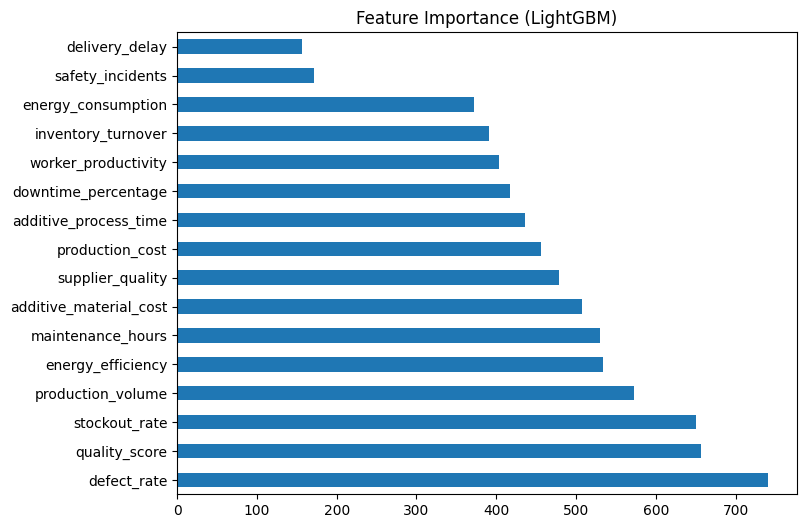

In [ ]:

clf = best_model.named_steps["clf"]

# Extract feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)


importances.plot(kind="barh", figsize=(8, 6))
plt.title("Feature Importance (LightGBM)")
plt.show()


top_features = importances.head(10).index.tolist()
X_top = X[top_features]

In [ ]:
from sklearn.base import clone
from sklearn.metrics import precision_recall_curve

X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, test_size=0.20, random_state=42, stratify=y
)
cols = X_top.columns.tolist()

clf = clone(best_model.named_steps["clf"])  # fresh copy of the tuned classifier

# Trees/boosting don’t need scaling; passthrough is fine
new_prep = ColumnTransformer([("num", "passthrough", cols)], remainder="drop")

best_model_top = Pipeline([
    ("prep", new_prep),
    ("clf", clf),
])


best_model_top.fit(X_train_top, y_train)


y_proba = best_model_top.predict_proba(X_test_top)[:, 1]


prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1 = 2 * prec * rec / (prec + rec + 1e-9)
best_idx = np.argmax(f1[:-1])
best_thr = thr[best_idx]
print(f"Best threshold by F1: {best_thr:.4f}")


y_pred_opt = (y_proba >= best_thr).astype(int)

test_acc = accuracy_score(y_test, y_pred_opt)
test_pr, test_rc, test_f1, _ = precision_recall_fscore_support(y_test, y_pred_opt, average="binary", zero_division=0)
test_roc = roc_auc_score(y_test, y_proba)

summary = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"],
    "Score": [test_acc, test_pr, test_rc, test_f1, test_roc]
})

report = classification_report(y_test, y_pred_opt, digits=3)

print(report)
print(summary)

Best threshold by F1: 0.2844
              precision    recall  f1-score   support

           0      0.949     0.728     0.824       103
           1      0.951     0.993     0.971       545

    accuracy                          0.951       648
   macro avg      0.950     0.860     0.898       648
weighted avg      0.951     0.951     0.948       648

      Metric     Score
0   Accuracy  0.950617
1  Precision  0.950791
2     Recall  0.992661
3   F1-score  0.971275
4    ROC-AUC  0.849826


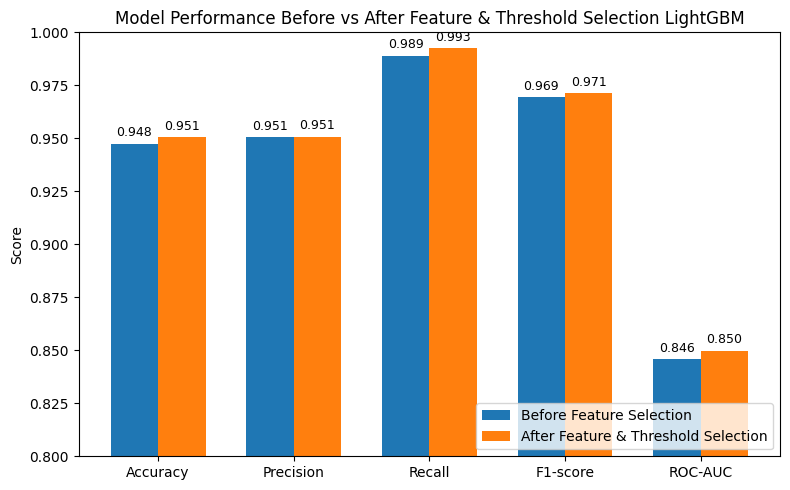

In [ ]:
# ---- Metrics before and after feature selection ----
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

before = [test_acc_all_features, test_pr_all_features, test_rc_all_features, test_f1_all_features, test_roc_all_features]
after  = [test_acc, test_pr, test_rc, test_f1, test_roc]

x = np.arange(len(metrics))
width = 0.35  

plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, before, width, label="Before Feature Selection")
bars2 = plt.bar(x + width/2, after,  width, label="After Feature & Threshold Selection")


plt.ylabel("Score")
plt.title("Model Performance Before vs After Feature & Threshold Selection" + ' ' + best_model_name)
plt.xticks(x, metrics)
plt.ylim(0.8, 1.0)
plt.legend(loc="lower right")


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.002,
                 f"{height:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

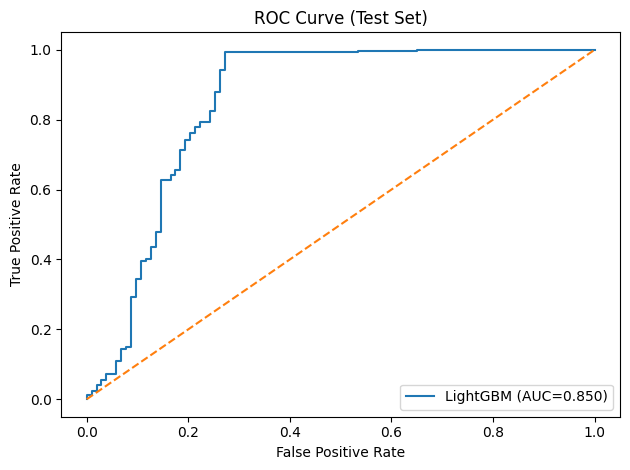

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC={test_roc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

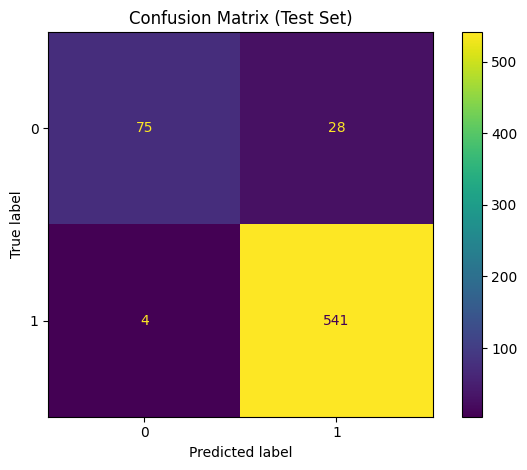

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_opt, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
plt.figure()
disp.plot(values_format="d")
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier

base_estimators = []
for name in top3:
    est = tuned_models.get(name, models[name])
    base_estimators.append((name, est))

# meta-learner: simple, strong, well-calibrated
final_lr = LogisticRegression(max_iter=2000, class_weight="balanced")

stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_lr,
    stack_method="predict_proba",   
    passthrough=False,              
    cv=cv
)

# fit on ALL features 
stack.fit(X_train, y_train)


def metrics_at_threshold(y_true, y_proba, thr):
    y_pred = (y_proba >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    pr, rc, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    auc = roc_auc_score(y_true, y_proba)
    return acc, pr, rc, f1, auc, y_pred


y_proba_stack = stack.predict_proba(X_test)[:, 1]

# default 0.50
acc50, pr50, rc50, f150, auc50, ypred50 = metrics_at_threshold(y_test, y_proba_stack, 0.50)

# best F1 threshold
prec, rec, thr = precision_recall_curve(y_test, y_proba_stack)
f1s = 2*prec*rec/(prec+rec+1e-9)
best_idx = np.argmax(f1s[:-1])      
best_thr_stack = thr[best_idx]

accB, prB, rcB, f1B, aucB, ypredB = metrics_at_threshold(y_test, y_proba_stack, best_thr_stack)

print(f"\nStacking best F1 threshold: {best_thr_stack:.4f}")
print("\nClassification report @ best F1 threshold:")
print(classification_report(y_test, ypredB, digits=3))

stack_rows = [
    {"Model": "Stack (all features) @0.50",       "Accuracy":acc50, "Precision":pr50, "Recall":rc50, "F1":f150, "ROC-AUC":auc50},
    {"Model": "Stack (all features) @best-F1",    "Accuracy":accB,  "Precision":prB,  "Recall":rcB,  "F1":f1B,  "ROC-AUC":aucB},
]



Stacking best F1 threshold: 0.0261

Classification report @ best F1 threshold:
              precision    recall  f1-score   support

           0      0.962     0.728     0.829       103
           1      0.951     0.994     0.972       545

    accuracy                          0.952       648
   macro avg      0.956     0.861     0.900       648
weighted avg      0.953     0.952     0.949       648



In [ ]:
lgbm_rows = [{
    "Model": "Best model (top feats) @best-F1" + " - " + best_model_name,
    "Accuracy": float(test_acc),
    "Precision": float(test_pr),
    "Recall": float(test_rc),
    "F1": float(test_f1),
    "ROC-AUC": float(test_roc)
}]


compare_df = pd.DataFrame(lgbm_rows + stack_rows).sort_values("F1", ascending=False)
compare_df

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
2,Stack (all features) @best-F1,0.952160,0.950877,0.994495,0.972197,0.837891
0,Best model (top feats) @best-F1 - LightGBM,0.950617,0.950791,0.992661,0.971275,0.849826
1,Stack (all features) @0.50,0.942901,0.950355,0.983486,0.966637,0.837891


In [33]:
best_row = compare_df.iloc[0]
print(best_row["Model"])


Stack (all features) @best-F1


In [ ]:
import json, joblib, pathlib


pathlib.Path("models").mkdir(exist_ok=True)


winner_model = stack      
winner_threshold = best_thr_stack    
feature_list = X.columns.tolist()   


joblib.dump(winner_model, "models/best_model.pkl")


with open("models/threshold.json", "w") as f:
    json.dump({"threshold": float(winner_threshold)}, f)


with open("models/features.txt", "w") as f:
    for c in feature_list:
        f.write(f"{c}\n")


compare_df.to_csv("models/leaderboard_test.csv", index=False)   # your table with F1, AUC, etc.
summary.to_csv("models/test_metrics.csv", index=False)          # the metrics block you printed
